In [1]:
include("jl/init_default.jl");

In [28]:
include("jl/all.jl")

load_raw_halos1600 (generic function with 3 methods)

In [29]:
to_rho!(pos,m, rho);

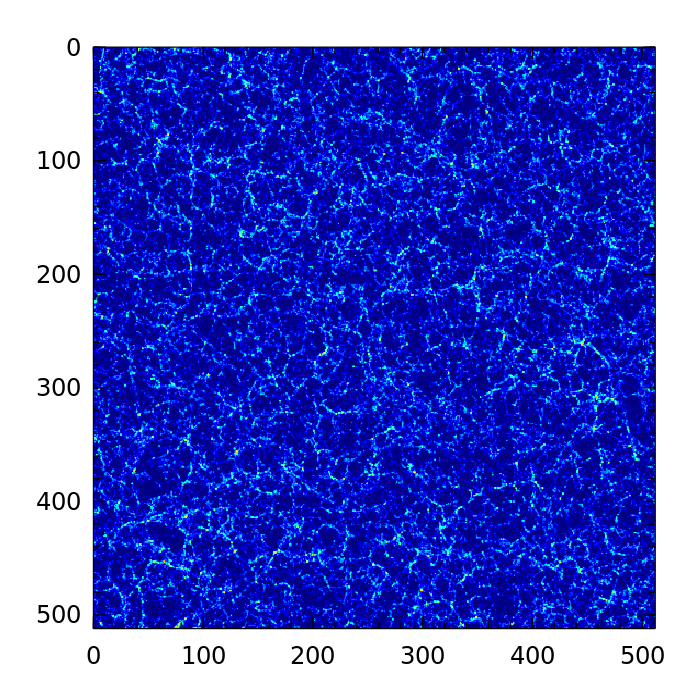

In [30]:
imrho = real(rho[:,:,328]) + real(rho[:,:,329]) + real(rho[:,:,330])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [31]:
to_delta!(rho);

In [32]:
to_g_fft!(rho);
in_place_multiply!(rho, -1.0/4π);

In [33]:
@time from_cic_dim2!(c,pos,rho,1);

  6.639849 seconds (67.72 k allocations: 571.203 MB, 0.04% gc time)


In [34]:
_lvx = -D(1.0)*F(1.0)*Ha(1.0)*real(c);

In [35]:
std(_lvx)

425.74915f0

In [36]:
to_tlpt_delta!(rho);

In [37]:
to_g_fft!(rho);
in_place_multiply!(rho, -1.0/4π);

In [67]:
@time from_cic_dim4!(c,pos,rho,1);

 13.497110 seconds (122.42 k allocations: 575.000 MB, 0.25% gc time)


In [68]:
_lvx2 = D2(1.0)*F2(1.0)*Ha(1.0)*real(c);

In [69]:
std(_lvx2)

309.26773f0

In [41]:
kd = get_kd(pos);

In [77]:
get_slope_std_smoothed(_lvx-_lvx2/5, vx, pos, 3000.0, 100000)

(0.7142091203841946,81.21377090199358)

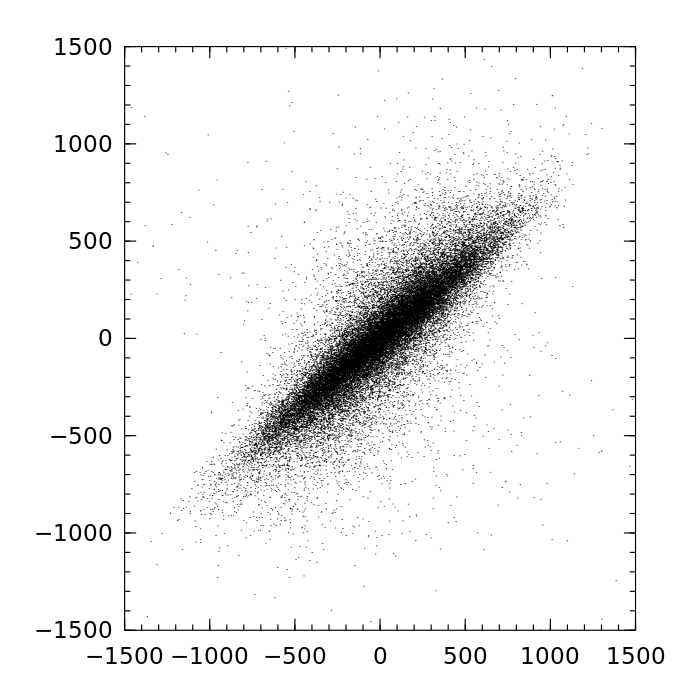

In [62]:
scatter((_lvx-_lvx2)[1:100:end], vx[1:100:end],0.00001)
xlim(-1500,1500)
ylim(-1500,1500)